In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def MinMaxScaler(data):
    numerator = data - np.min(data,0)
    denominator = np.max(data, 0) - np.min(data,0)
    return numerator / (denominator + 1e-7)

In [3]:
seq_length = 7
data_dim = 5
output_dim = 1
learning_rate = 0.01
iterations = 500

In [4]:
xy = np.loadtxt('../DeepLearningZeroToAll/data-02-stock_daily.csv', delimiter=',')
xy = xy[::-1]

In [5]:
train_size = int(len(xy)*0.7)
train_set = xy[0:train_size]
test_set = xy[train_size-seq_length:]

In [6]:
train_set = MinMaxScaler(train_set)
test_set = MinMaxScaler(test_set)

In [7]:
def build_dataset(time_series, seq_length):
    dataX = []
    dataY = []
    for i in range(0, len(time_series)-seq_length):
        x = time_series[i:i+seq_length, :]
        y = time_series[i+seq_length, [-1]]
        print(x, "->", y)
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX), np.array(dataY)

In [8]:
trainX, trainY = build_dataset(train_set, seq_length)
testX, testY = build_dataset(test_set, seq_length)

[[2.53065030e-01 2.45070970e-01 2.33983036e-01 4.66075110e-04
  2.32039560e-01]
 [2.29604366e-01 2.39728936e-01 2.54567513e-01 2.98467330e-03
  2.37426028e-01]
 [2.49235510e-01 2.41668371e-01 2.48338489e-01 2.59926504e-04
  2.26793794e-01]
 [2.21013495e-01 2.46602231e-01 2.54710584e-01 0.00000000e+00
  2.62668239e-01]
 [3.63433786e-01 3.70389871e-01 2.67168847e-01 1.24764722e-02
  2.62105010e-01]
 [2.59447633e-01 3.10673724e-01 2.74113889e-01 4.56323384e-01
  2.71751265e-01]
 [2.76008150e-01 2.78314566e-01 1.98470380e-01 5.70171193e-01
  1.78104644e-01]] -> [0.16053716]
[[2.29604366e-01 2.39728936e-01 2.54567513e-01 2.98467330e-03
  2.37426028e-01]
 [2.49235510e-01 2.41668371e-01 2.48338489e-01 2.59926504e-04
  2.26793794e-01]
 [2.21013495e-01 2.46602231e-01 2.54710584e-01 0.00000000e+00
  2.62668239e-01]
 [3.63433786e-01 3.70389871e-01 2.67168847e-01 1.24764722e-02
  2.62105010e-01]
 [2.59447633e-01 3.10673724e-01 2.74113889e-01 4.56323384e-01
  2.71751265e-01]
 [2.76008150e-01 2.7831

 [0.09107454 0.09103957 0.10219805 0.11551492 0.08547077]] -> [0.09902474]
[[0.10822158 0.10300312 0.11791384 0.19801918 0.09842631]
 [0.10377083 0.10109767 0.10978741 0.17505602 0.10310868]
 [0.09117814 0.09755902 0.11999024 0.11006543 0.10860071]
 [0.08572694 0.09960051 0.112544   0.11406292 0.10669948]
 [0.09825078 0.10276492 0.09886878 0.14244869 0.11430396]
 [0.09107454 0.09103957 0.10219805 0.11551492 0.08547077]
 [0.09821624 0.09456471 0.11737677 0.16415703 0.09902474]] -> [0.13229384]
[[0.10377083 0.10109767 0.10978741 0.17505602 0.10310868]
 [0.09117814 0.09755902 0.11999024 0.11006543 0.10860071]
 [0.08572694 0.09960051 0.112544   0.11406292 0.10669948]
 [0.09825078 0.10276492 0.09886878 0.14244869 0.11430396]
 [0.09107454 0.09103957 0.10219805 0.11551492 0.08547077]
 [0.09821624 0.09456471 0.11737677 0.16415703 0.09902474]
 [0.10915296 0.12447361 0.13599227 0.17467061 0.13229384]] -> [0.19010097]
[[0.09117814 0.09755902 0.11999024 0.11006543 0.10860071]
 [0.08572694 0.099600

 [0.69294424 0.68747414 0.73222858 0.1539164  0.70867949]] -> [0.63287754]
[[0.59199089 0.57441791 0.61415427 0.27270355 0.60103943]
 [0.60799703 0.59946948 0.61282756 0.10935724 0.58204419]
 [0.58749476 0.59552027 0.63759978 0.07316573 0.61615184]
 [0.60943573 0.6180959  0.63621243 0.10842543 0.64488369]
 [0.65343805 0.69289697 0.69763622 0.1677631  0.71053122]
 [0.69294424 0.68747414 0.73222858 0.1539164  0.70867949]
 [0.66986386 0.65098725 0.6651038  0.17652211 0.63287754]] -> [0.68544303]
[[0.60799703 0.59946948 0.61282756 0.10935724 0.58204419]
 [0.58749476 0.59552027 0.63759978 0.07316573 0.61615184]
 [0.60943573 0.6180959  0.63621243 0.10842543 0.64488369]
 [0.65343805 0.69289697 0.69763622 0.1677631  0.71053122]
 [0.69294424 0.68747414 0.73222858 0.1539164  0.70867949]
 [0.66986386 0.65098725 0.6651038  0.17652211 0.63287754]
 [0.62646125 0.67014433 0.67260369 0.10570454 0.68544303]] -> [0.67678159]
[[0.58749476 0.59552027 0.63759978 0.07316573 0.61615184]
 [0.60943573 0.618095

In [9]:
print(trainX.shape)
print(trainY.shape)

(505, 7, 5)
(505, 1)


In [10]:
tf.model = tf.keras.Sequential()

In [11]:
tf.model.add(tf.keras.layers.LSTM(units=1, input_shape=(seq_length, data_dim)))
tf.model.add(tf.keras.layers.Dense(units=output_dim, activation='tanh'))
tf.model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1)                 28        
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


In [12]:
tf.model.compile(loss='mean_squared_error',
                optimizer=tf.keras.optimizers.Adam(lr=learning_rate))
tf.model.fit(trainX,trainY,epochs=iterations)

Train on 505 samples
Epoch 1/500
505/505 [==============================] - 2s 3ms/sample - loss: 0.2164
Epoch 2/500
505/505 [==============================] - 0s 103us/sample - loss: 0.0688
Epoch 3/500
505/505 [==============================] - 0s 92us/sample - loss: 0.0544
Epoch 4/500
505/505 [==============================] - 0s 89us/sample - loss: 0.0383
Epoch 5/500
505/505 [==============================] - 0s 89us/sample - loss: 0.0246
Epoch 6/500
505/505 [==============================] - 0s 91us/sample - loss: 0.0146
Epoch 7/500
505/505 [==============================] - 0s 99us/sample - loss: 0.0088
Epoch 8/500
505/505 [==============================] - 0s 103us/sample - loss: 0.0059
Epoch 9/500
505/505 [==============================] - 0s 90us/sample - loss: 0.0048
Epoch 10/500
505/505 [==============================] - 0s 94us/sample - loss: 0.0042
Epoch 11/500
505/505 [==============================] - 0s 88us/sample - loss: 0.0040
Epoch 12/500
505/505 [===================

505/505 [==============================] - 0s 89us/sample - loss: 0.0017
Epoch 97/500
505/505 [==============================] - 0s 89us/sample - loss: 0.0017
Epoch 98/500
505/505 [==============================] - 0s 92us/sample - loss: 0.0018
Epoch 99/500
505/505 [==============================] - 0s 92us/sample - loss: 0.0017
Epoch 100/500
505/505 [==============================] - 0s 87us/sample - loss: 0.0017
Epoch 101/500
505/505 [==============================] - 0s 88us/sample - loss: 0.0018
Epoch 102/500
505/505 [==============================] - 0s 97us/sample - loss: 0.0017
Epoch 103/500
505/505 [==============================] - 0s 91us/sample - loss: 0.0017
Epoch 104/500
505/505 [==============================] - 0s 118us/sample - loss: 0.0017
Epoch 105/500
505/505 [==============================] - 0s 137us/sample - loss: 0.0017
Epoch 106/500
505/505 [==============================] - 0s 127us/sample - loss: 0.0017
Epoch 107/500
505/505 [==============================] - 

Epoch 190/500
505/505 [==============================] - 0s 89us/sample - loss: 0.0014
Epoch 191/500
505/505 [==============================] - 0s 100us/sample - loss: 0.0015
Epoch 192/500
505/505 [==============================] - 0s 108us/sample - loss: 0.0014
Epoch 193/500
505/505 [==============================] - 0s 89us/sample - loss: 0.0014
Epoch 194/500
505/505 [==============================] - 0s 92us/sample - loss: 0.0015
Epoch 195/500
505/505 [==============================] - 0s 108us/sample - loss: 0.0014
Epoch 196/500
505/505 [==============================] - 0s 109us/sample - loss: 0.0014
Epoch 197/500
505/505 [==============================] - 0s 105us/sample - loss: 0.0014
Epoch 198/500
505/505 [==============================] - 0s 106us/sample - loss: 0.0014
Epoch 199/500
505/505 [==============================] - 0s 108us/sample - loss: 0.0014
Epoch 200/500
505/505 [==============================] - 0s 107us/sample - loss: 0.0014
Epoch 201/500
505/505 [============

505/505 [==============================] - 0s 89us/sample - loss: 0.0013
Epoch 284/500
505/505 [==============================] - 0s 92us/sample - loss: 0.0013
Epoch 285/500
505/505 [==============================] - 0s 87us/sample - loss: 0.0013
Epoch 286/500
505/505 [==============================] - 0s 88us/sample - loss: 0.0013
Epoch 287/500
505/505 [==============================] - 0s 92us/sample - loss: 0.0013
Epoch 288/500
505/505 [==============================] - 0s 87us/sample - loss: 0.0013
Epoch 289/500
505/505 [==============================] - 0s 88us/sample - loss: 0.0013
Epoch 290/500
505/505 [==============================] - 0s 89us/sample - loss: 0.0013
Epoch 291/500
505/505 [==============================] - 0s 93us/sample - loss: 0.0014
Epoch 292/500
505/505 [==============================] - 0s 86us/sample - loss: 0.0013
Epoch 293/500
505/505 [==============================] - 0s 87us/sample - loss: 0.0013
Epoch 294/500
505/505 [==============================] - 

505/505 [==============================] - 0s 94us/sample - loss: 0.0013
Epoch 377/500
505/505 [==============================] - 0s 105us/sample - loss: 0.0013
Epoch 378/500
505/505 [==============================] - 0s 88us/sample - loss: 0.0013
Epoch 379/500
505/505 [==============================] - 0s 94us/sample - loss: 0.0012
Epoch 380/500
505/505 [==============================] - 0s 89us/sample - loss: 0.0012
Epoch 381/500
505/505 [==============================] - 0s 90us/sample - loss: 0.0012
Epoch 382/500
505/505 [==============================] - 0s 110us/sample - loss: 0.0012
Epoch 383/500
505/505 [==============================] - 0s 119us/sample - loss: 0.0013
Epoch 384/500
505/505 [==============================] - 0s 118us/sample - loss: 0.0013
Epoch 385/500
505/505 [==============================] - 0s 117us/sample - loss: 0.0014
Epoch 386/500
505/505 [==============================] - 0s 115us/sample - loss: 0.0013
Epoch 387/500
505/505 [============================

505/505 [==============================] - 0s 101us/sample - loss: 0.0014
Epoch 470/500
505/505 [==============================] - 0s 104us/sample - loss: 0.0012
Epoch 471/500
505/505 [==============================] - 0s 91us/sample - loss: 0.0012
Epoch 472/500
505/505 [==============================] - 0s 88us/sample - loss: 0.0012
Epoch 473/500
505/505 [==============================] - 0s 103us/sample - loss: 0.0012
Epoch 474/500
505/505 [==============================] - 0s 108us/sample - loss: 0.0012
Epoch 475/500
505/505 [==============================] - 0s 104us/sample - loss: 0.0012
Epoch 476/500
505/505 [==============================] - 0s 105us/sample - loss: 0.0012
Epoch 477/500
505/505 [==============================] - 0s 111us/sample - loss: 0.0013
Epoch 478/500
505/505 [==============================] - 0s 105us/sample - loss: 0.0012
Epoch 479/500
505/505 [==============================] - 0s 104us/sample - loss: 0.0013
Epoch 480/500
505/505 [=========================

In [13]:
test_predict = tf.model.predict(testX)

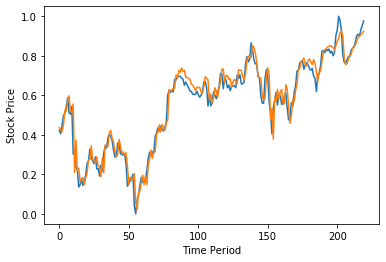

In [14]:
plt.plot(testY)
plt.plot(test_predict)
plt.xlabel("Time Period")
plt.ylabel("Stock Price")
plt.show()